<a href="https://colab.research.google.com/github/tamil204/Alzheimer-Disease/blob/main/Alzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# unzip the file

import zipfile

with zipfile.ZipFile('/content/augmented_alzheimer.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [3]:
!pip install imagehash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 71.5 MB/s eta 0:00:00


In [4]:
#Import neccessary packages
!pip install imagehash # install imagehash library
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import imgaug.augmenters as iaa
import os
from PIL import Image
import numpy as np
import imagehash # now you can import imagehash
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
#Load the dataset
dataset_path = r'/content/content/augmented_alzheimer'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Create training data generator
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Create validation data generator
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
print(train_generator.class_indices)

Found 637 images belonging to 4 classes.
Found 156 images belonging to 4 classes.
{'mild': 0, 'moderate': 1, 'normal': 2, 'very_mild': 3}


In [5]:
# Paths to directories
extracted_directory = r'/content/content/augmented_alzheimer'
processed_directory = r'/content/content/processed'
os.makedirs(processed_directory, exist_ok=True)

# Define target size for resizing
target_size = (800, 800) #150
def normalize_image(image):
    """Normalize image to [0, 1] range and convert back to 8-bit image."""
    img_array = np.array(image)
    normalized_array = img_array / 255.0
    return Image.fromarray((normalized_array * 255).astype(np.uint8))

def resize_image(image, size):
    """Resize image to the specified size."""
    return image.resize(size, Image.LANCZOS)

def get_image_hash(image):
    """Compute the hash of an image to identify duplicates."""
    return imagehash.average_hash(image)

def process_images():
    seen_hashes = set()
    for root, dirs, files in os.walk(extracted_directory):
        relative_path = os.path.relpath(root, extracted_directory)
        save_path = os.path.join(processed_directory, relative_path)
        os.makedirs(save_path, exist_ok=True)

        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    # Normalize the image
                    normalized_img = normalize_image(img)
                    # Resize the normalized image
                    resized_img = resize_image(normalized_img, target_size)
                    # Compute the hash of the image
                    img_hash = get_image_hash(resized_img)

                    if img_hash not in seen_hashes:
                        seen_hashes.add(img_hash)
                        processed_image_path = os.path.join(save_path, file)
                        resized_img.save(processed_image_path)
                        print(f"Processed and saved: {processed_image_path}")
                    else:
                        print(f"Duplicate image skipped: {file_path}")
            except Exception as e:
                print(f"Skipping file {file_path} due to error: {e}")
process_images()
print("Image preprocessing complete!")



Processed and saved: /content/content/processed/moderate/aug_0_9720.jpg
Processed and saved: /content/content/processed/moderate/aug_0_2579.jpg
Processed and saved: /content/content/processed/moderate/aug_0_1913.jpg
Processed and saved: /content/content/processed/moderate/aug_0_9657.jpg
Processed and saved: /content/content/processed/moderate/aug_0_2675.jpg
Processed and saved: /content/content/processed/moderate/aug_0_2888.jpg
Duplicate image skipped: /content/content/augmented_alzheimer/moderate/aug_0_2845.jpg
Processed and saved: /content/content/processed/moderate/aug_0_9339.jpg
Processed and saved: /content/content/processed/moderate/aug_0_415.jpg
Processed and saved: /content/content/processed/moderate/aug_0_3174.jpg
Duplicate image skipped: /content/content/augmented_alzheimer/moderate/aug_0_4951.jpg
Processed and saved: /content/content/processed/moderate/aug_0_9267.jpg
Duplicate image skipped: /content/content/augmented_alzheimer/moderate/aug_0_5950.jpg
Processed and saved: /c

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
augmented_directory = r'/content/content/processed'
output_directory = r'/content/content/outputdirectory'

# Create output directories if they do not exist
os.makedirs(output_directory, exist_ok=True)

# Function to split the dataset
def split_dataset(src_folder, dest_folder, split_ratio=0.9):
    classes = os.listdir(src_folder)

    for class_name in classes:
        class_folder = os.path.join(src_folder, class_name)
        if not os.path.isdir(class_folder):
            continue

        files = os.listdir(class_folder)
        train_files, test_files = train_test_split(files, train_size=split_ratio, random_state=42)

        # Create class directories in the destination
        train_dir = os.path.join(dest_folder, 'train', class_name)
        test_dir = os.path.join(dest_folder, 'test', class_name)
        os.makedirs(train_dir, exist_ok=True)
        os.makedirs(test_dir, exist_ok=True)

        # Copy files to train and test directories
        for file in train_files:
            shutil.copy(os.path.join(class_folder, file), train_dir)
        for file in test_files:
            shutil.copy(os.path.join(class_folder, file), test_dir)

# Split the dataset
split_dataset(augmented_directory, output_directory)
print("Dataset split into train and test sets!")


Dataset split into train and test sets!


In [8]:
train_directory = r'/content/content/outputdirectory/train'
test_directory = r'/content/content/outputdirectory/test'
len(train_directory)

38

In [9]:


train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values to [0, 1]
    shear_range=0.2,           # Apply random shear transformations
    zoom_range=0.2,            # Apply random zoom transformations
    horizontal_flip=True       # Randomly flip images horizontally
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(150, 150),    # Resize images to 150x150
    batch_size=32,
    class_mode='categorical'  # Use categorical labels for multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(150, 150),    # Resize images to 150x150
    batch_size=32,
    class_mode='categorical'  # Use categorical labels for multi-class classification
)


Found 127 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
import numpy as np
from tensorflow.keras.regularizers import l2

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),  # Increased regularization
    Dropout(0.5),  # Dropout
    Dense(4, activation='softmax')  # Number of classes
])

# Compile the model with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training without class weights
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,  # Increased number of epochs
    batch_size=64,  # Larger batch size
    callbacks=[early_stopping]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.3816 - loss: 10.1009 - val_accuracy: 0.2778 - val_loss: 8.0030
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4017 - loss: 7.3959 - val_accuracy: 0.4444 - val_loss: 5.8081
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5005 - loss: 5.3565 - val_accuracy: 0.4444 - val_loss: 4.2266
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4870 - loss: 3.8789 - val_accuracy: 0.4444 - val_loss: 3.1607
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4348 - loss: 2.9708 - val_accuracy: 0.4444 - val_loss: 2.4330
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5068 - loss: 2.2529 - val_accuracy: 0.4444 - val_loss: 2.0570
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.4829 - loss: 1.9227 - val_accuracy: 0.4444 - val_loss: 1.7410
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4932 - loss: 1.6489 - val_accuracy: 0.4444 - val_loss: 1.6074
Epoch 9/20
4/4 ━━━━━━━━━

In [14]:
# Save the model
model.save('cnn_classification_model_7.h5')
print("Model training complete and saved as cnn_classification_model_1.h5")

Model training complete and saved as cnn_classification_model_1.h5


In [27]:
# save the model
from google.colab import files
files.download('/content/cnn_classification_model_7.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step - accuracy: 0.7778 - loss: 0.9236
Test accuracy: 0.7777777910232544


Found 127 images belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Predicted class: very_mild


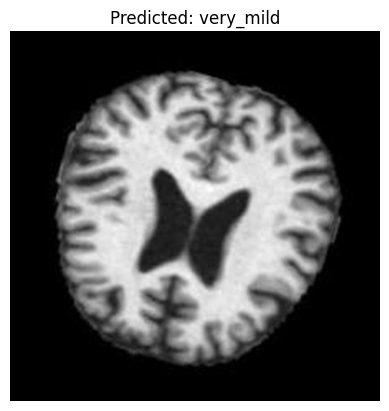

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load your trained model
model = tf.keras.models.load_model(r'cnn_classification_model_7.h5')

def preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array

def predict_class(img_path, model):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    return predicted_class

def get_class_names(train_generator):
    class_labels = train_generator.class_indices
    return list(class_labels.keys())

# Path to your test image
img_path = r'/content/content/processed/very_mild/aug_0_8804.jpg'

# Set up ImageDataGenerator for getting class names
train_directory = r'/content/content/outputdirectory/train'
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(150, 150),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

class_names = get_class_names(train_generator)

# Predict the class of the test image
predicted_class_index = predict_class(img_path, model)
predicted_class_name = class_names[predicted_class_index]
print(f'Predicted class: {predicted_class_name}')

# Display the test image
def show_image(img_path):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {predicted_class_name}')
    plt.show()

show_image(img_path)


In [20]:
# Install Streamlit and pyngrok
!pip install streamlit
!pip install pyngrok

# If you have other dependencies, install them here
# For example:
# !pip install tensorflow
# !pip install pillow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.1 MB/s eta 0:00:00


In [26]:
!pip install streamlit
!pip install tensorflow
!pip install pillow
!pip install pyngrok


In [ ]:
import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np

# Load your trained CNN model
model = tf.keras.models.load_model('path_to_your_model.h5')  # Update this with the actual model path

# Define the class names (adjust as per your model's classes)
class_names = ['Class1', 'Class2', 'Class3']  # Replace with actual class labels

# Streamlit app title
st.title('Image Classification using CNN')

# User instructions
st.write("""
         Upload an image and the model will classify it.
         """)

# File uploader
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

# If a file has been uploaded
if uploaded_file is not None:
    # Open the uploaded image
    image = Image.open(uploaded_file)

    # Display the uploaded image
    st.image(image, caption='Uploaded Image.', use_column_width=True)

    # Preprocess the image for model prediction
    image = image.resize((224, 224))  # Resize the image as per your model's input size
    image_array = np.array(image) / 255.0  # Normalize the image if required by the model
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(image_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions) * 100

    # Show the prediction results
    st.write(f"### Predicted Class: {predicted_class}")
    st.write(f"### Confidence: {confidence:.2f}%")